<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-data" data-toc-modified-id="Read-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#Plot-data" data-toc-modified-id="Plot-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot data</a></span><ul class="toc-item"><li><span><a href="#Approximation-ratio" data-toc-modified-id="Approximation-ratio-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Approximation ratio</a></span></li><li><span><a href="#Performance-ratio" data-toc-modified-id="Performance-ratio-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Performance ratio</a></span></li></ul></li></ul></div>

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import qtensor

# Heuristic plot Approximation Ratio vs p

In [3]:
import json
import collections
mpl.rcParams.update({'font.size': 16})

NMAX = 2500

## Read data

In [12]:
DATA_FILE = '../data/ALL_3r_graphs.json'

In [35]:
def load_heuristic_ar_data(jsonfile, verbose=True):
    datacollection = collections.defaultdict(lambda :[])
    data = json.load(open(jsonfile))
    if verbose:
        print(f'Loaded {len(data)} of 4681 graphs')
    datacollection = collections.defaultdict(lambda :[])
    for dat in data:
        for key in dat.keys():
            if True:#len(dat['edges'])<=14*1.5:
                datacollection[key] += [dat[key]]
            
    return datacollection

datacol = load_heuristic_ar_data(DATA_FILE)
print('datacollection keys', list(datacol.keys()))

Loaded 4681 of 4681 graphs
datacollection keys ['GW computation time (sec)', 'edges', 'maxcut', 'GWave', 'Nvertices', 'QAOA_1', 'AR_1', 'WS computation time (sec)', 'QAOA_2', 'AR_2', 'QAOA_3', 'AR_3', 'QAOA_4', 'AR_4', 'QAOA_5', 'AR_5', 'QAOA_6', 'AR_6', 'QAOA_7', 'AR_7', 'QAOA_8', 'AR_8', 'QAOA_9', 'AR_9', 'QAOA_10', 'AR_10', 'QAOA_11', 'AR_11']


In [22]:
    
def parse_heursitic_ar_data(datacollection):
    """
    Returns:
        AR (numpy.array of shape (11, NMAX)): Approximation ratio, optimal cost/qaoa_cost
        PR (numpy.array of shape (11, NMAX)): Performance ratio, GW cost/qaoa_cost
    """
    AR = np.zeros([11,len(datacollection['AR_1'])])
    PR = np.zeros([11,len(datacollection['AR_1'])])
    
    for p in range(1,12):
        key1 = 'AR_'+str(p)
        key2 = 'QAOA_'+str(p)
        key3 = 'GWave'
        AR[p-1] = datacollection[key1]
        PR[p-1] = np.array(datacollection[key2])/np.array(datacollection[key3])

    return AR, PR

In [23]:
AR, PR = parse_heursitic_ar_data(datacol)

In [24]:
def get_guarantees(ps=range(1, 12), degree=3):
    guarantees = [qtensor.tools.BETHE_QAOA_VALUES[str(p)]['val'] for p in ps]
    return guarantees

In [25]:
guarantees = get_guarantees(ps=range(1, 12), degree=3)

## Plot data

In [64]:
def get_colors(num=2, offset=0.25, cmap=mpl.cm.gnuplot2):
    """
    returns:
        Array of len ``num``.
    """
    
    return np.array([cmap(x) for x in np.linspace(offset, 1-offset, num)])

c_prim, c_sec = get_colors(offset=0.25)

In [27]:
from mpl_toolkits.axes_grid1 import Divider, Size

def add_sized_axis(fig, axsize):
    # The first items are for padding and the second items are for the axes.
    # sizes are in inch.
    h = [Size.Fixed(1.0), Size.Fixed(axsize[0]), Size.Fixed(.5)]
    v = [Size.Fixed(0.7), Size.Fixed(axsize[1])]

    divider = Divider(fig, (0, 0, 1, 1), h, v, aspect=False)
    # The width and height of the rectangle are ignored.

    ax = fig.add_axes(divider.get_position(),
                      axes_locator=divider.new_locator(nx=1, ny=1))

### Approximation ratio


In [28]:
def plot_ar(x, data, c_prim, c_sec, alpha=0.15, axsize=(6, 6/1.618)):
    fig = plt.figure(figsize=(axsize[0]+1.5, axsize[1]+.8))
    add_sized_axis(fig, axsize)
    #plt.subplots_adjust(left=0.15,right=0.85)

    mi = data.min(1)
    av = np.average(data, 1)
    ma = data.max(1)


    plt.plot(x, av,'o-', label='Average', color=c_prim)
    #plt.plot(np.arange(1,12),maxAR,'.-',label='Max', color=c_prim)
    #plt.plot(np.arange(1,12),minAR,'.-', label='Minimum', color=c_prim)
    plt.fill_between(x, mi, ma, color=c_prim, alpha=alpha, label='Value range')

    plt.plot(x, guarantees,'o-',label='$\\nu=3$ Guarantee', color=c_sec)

    #plt.axis([1,11,0.6,1.005])
    ax = plt.gca()
    ax.set_xticks(np.arange(1,12))
    plt.xlabel('p')
    plt.ylabel('Approximation ratio')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    return fig

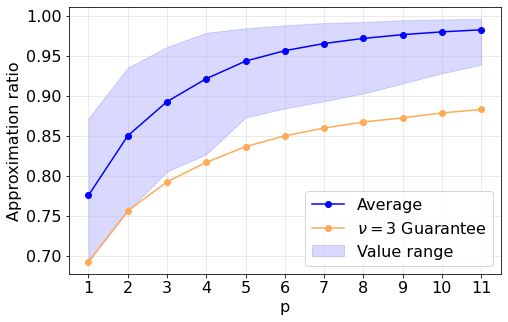

In [33]:
plot_ar(np.arange(1, 12), AR, c_prim=c_prim, c_sec=c_sec)
plt.savefig('../plots/pdf/ar_vs_p_N4-16.pdf')

### Performance ratio

In [36]:
import xarray as xar

In [135]:
gw_sol = xar.open_dataarray('../data/GW_cost_vs_N.nc')
gw_sol = gw_sol.rename({'seeds': 'seed', 'sizes':'N'})
qaoa_sol = xar.open_dataarray('../data/QAOA_cost_vs_N.nc')
qaoa_sol.coords

Coordinates:
  * seed     (seed) int32 10 11 12 13 14 15 16 17 18 ... 34 35 36 37 38 39 40 41
  * N        (N) int32 8 16 32 64 128 256
  * p        (p) int32 1 2 3 4

In [136]:
gw_sol.coords

Coordinates:
  * seed     (seed) int32 10 11 12 13 14 15 16 17 18 ... 34 35 36 37 38 39 40 41
  * N        (N) int32 8 16 32 64 128 256

In [132]:
PR_large = qaoa_sol.sel(N=[64, 256])/gw_sol.sel(N=[64, 256])
PR_large.coords

Coordinates:
  * seed     (seed) int32 10 11 12 13 14 15 16 17 18 ... 34 35 36 37 38 39 40 41
  * N        (N) int32 64 256
  * p        (p) int32 1 2 3 4

In [142]:
def plot_pr(x, data, data_large, alpha=0.15, axsize=(6, 6/1.618)):
    margin = (0.2, 0.2)
    fig = plt.figure(figsize=(axsize[0]+1.5, axsize[1]+.8))
    add_sized_axis(fig, axsize)
    #plt.subplots_adjust(left=0.15,right=0.85)
    c_prim, *c_other, c_sec = get_colors(4)
    c_other=iter(c_other)

    mi = data.min(1)
    av = np.average(data,1)
    ma = data.max(1)


    plt.plot(x, av,'o-', label=r'Average, $N \leq 16$', color=c_prim)
    plt.fill_between(x, mi, ma, color=c_prim, alpha=alpha, label='Value range')
    
    for N in PR_large.N:
        plt.plot(PR_large.p, PR_large.sel(N=N).mean('seed'),'o-', label=fr'$N={int(N)}$',
                 color=next(c_other))
    

    plt.hlines(1, min(x)-.5, max(x)+.5, color=c_sec, linestyle='--')
    plt.xlim(0.5, 11.5)

    #plt.axis([1,11,0.6,1.005])
    ax = plt.gca()
    ax.set_xticks(np.arange(1,12))
    plt.xlabel('p')
    plt.ylabel('Performance ratio')
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [0,3,1,2]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], ncol=2, loc='lower right')
    plt.grid(alpha=0.3)
    print(plt.gca().dataLim.bounds)
    return fig

(0.5, 0.692450089728131, 11.0, 0.39191116144676774)


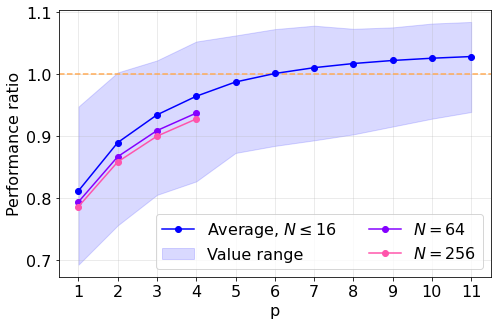

In [143]:
x = np.arange(1, 12, 1)
fig = plot_pr(x, PR, PR_large)
plt.savefig('../plots/pdf/pr_vs_pN4-16.pdf')